# Convolutional Neural Networks

In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8), interpolation="nearest")
    plt.axis("off")

## Vizualizing convolution output

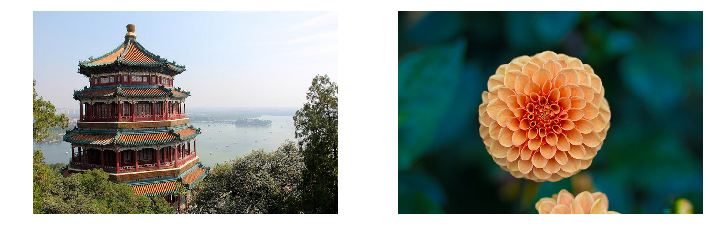

In [3]:
from sklearn.datasets import load_sample_image

china_img = load_sample_image("china.jpg")
flower_img = load_sample_image("flower.jpg")
dataset = np.array([china_img, flower_img], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

plt.figure(figsize=(12,6))
plt.subplot(121)
plot_image(china_img)
plt.subplot(122)
plot_image(flower_img)


In [4]:
# creating horizonal and vertical filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line

# graph with input X and convolutional layer applying the 2 filters
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


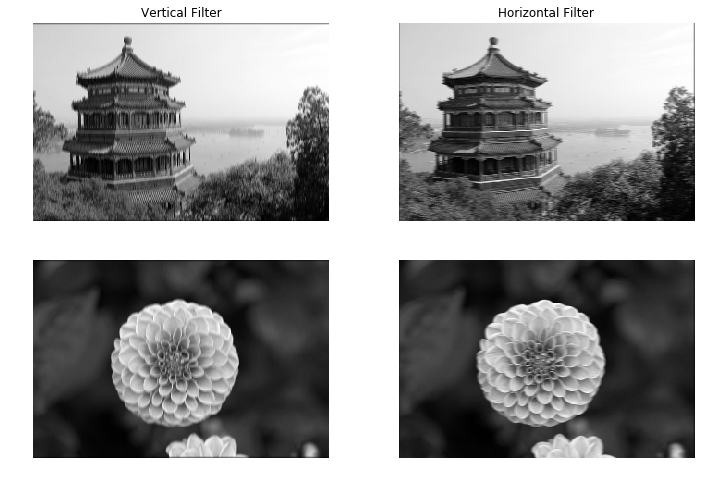

In [5]:
plt.figure(figsize=(12,8))
subplot_idx = 221
for image_idx in (0,1):
    for feature_map_idx in (0, 1):
        plt.subplot(subplot_idx)
        plot_image(output[image_idx, :, :, feature_map_idx])
        subplot_idx += 1

plt.subplot(221)
plt.title("Vertical Filter")
plt.subplot(222)
plt.title("Horizontal Filter")
plt.show()

## CNN for MNIST

In [6]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(os.getcwd() + "/tmp/data/")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /Users/dhensle/Documents/dabbles-in-ML/oreilly/tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /Users/dhensle/Documents/dabbles-in-ML/oreilly/tmp/data/train-labels-idx1-ubyte.gz
Extracting /Users/dhensle/Documents/dabbles-in-ML/oreilly/tmp/data/t10k-images-idx3-ubyte.gz
Extracting /Users/dhensle/Documents/dabbles-in-ML/oreilly/tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [7]:
height, width = 28, 28
channels = 1
n_inputs = height * width

tf.reset_default_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None], name="y")

conv1 = tf.layers.conv2d(X_reshaped, 
                         filters=32, 
                         kernel_size=3, 
                         strides=1, 
                         padding="SAME", 
                         activation=tf.nn.relu, name="conv1")

conv2 = tf.layers.conv2d(conv1, 
                         filters=64, 
                         kernel_size=3, 
                         strides=2, 
                         padding="SAME", 
                         activation=tf.nn.relu, name="conv2")

with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, 64 * 7 * 7])
    
with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat, 64, activation=tf.nn.relu, name="fc1")

with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, 10, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")
    
with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()


Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.dense instead.


In [8]:
n_epochs = 10
batch_size = 100

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train Accuracy: ", acc_train, "\tTest Accuracy: ", acc_test)

0 Train Accuracy:  0.97 	Test Accuracy:  0.9789
1 Train Accuracy:  0.98 	Test Accuracy:  0.9838
2 Train Accuracy:  1.0 	Test Accuracy:  0.9867
3 Train Accuracy:  0.99 	Test Accuracy:  0.9865
4 Train Accuracy:  0.99 	Test Accuracy:  0.9886
5 Train Accuracy:  1.0 	Test Accuracy:  0.988
6 Train Accuracy:  1.0 	Test Accuracy:  0.9884
7 Train Accuracy:  1.0 	Test Accuracy:  0.9892
8 Train Accuracy:  1.0 	Test Accuracy:  0.9851
9 Train Accuracy:  1.0 	Test Accuracy:  0.9881


Achieved $\textbf{99% test accuracy}$ on the MNIST dataset using a CNN with 2 convolutions(32 3x3 + 1(S) and 64 3x3 + 2(S)), a max pooling layer, a dense layer of 64 units, and an output layer of 10.

## Implementation with Keras

In [9]:
from tensorflow.keras import utils

num_classes = 10

X_train = mnist.train.images
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
y_train = utils.to_categorical(mnist.train.labels)

In [10]:
X_train[1][17][18][0]

0.98823535

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

tf.reset_default_graph()

model = Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="SAME", activation=tf.nn.relu, input_shape=(28,28,1)))
model.add(layers.Conv2D(filters=64, kernel_size=3, strides=2, padding="SAME", activation=tf.nn.relu))
model.add(layers.MaxPooling2D(2))
model.add(layers.Flatten())
model.add(layers.Dense(65, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [12]:
model.fit(X_train, y_train, epochs=10, batch_size=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
55000/55000 [==============================] - 57s 1ms/sample - loss: 0.1342 - acc: 0.9588
Epoch 2/10
55000/55000 [==============================] - 96s 2ms/sample - loss: 0.0462 - acc: 0.9852
Epoch 3/10
55000/55000 [==============================] - 73s 1ms/sample - loss: 0.0314 - acc: 0.9903
Epoch 4/10
55000/55000 [==============================] - 80s 1ms/sample - loss: 0.0210 - acc: 0.9936
Epoch 5/10
55000/55000 [==============================] - 93s 2ms/sample - loss: 0.0176 - acc: 0.9941
Epoch 6/10
55000/55000 [==============================] - 52s 945us/sample - loss: 0.0125 - acc: 0.9956
Epoch 7/10
55000/55000 [==============================] - 52s 947us/sample - loss: 0.0109 - acc: 0.9964
Epoch 8/10
55000/55000 [==============================] - 52s 942us/sample - loss: 0.0109 - acc: 0.9963
Epoch 9/10
55000/55000 [==============================] - 52s 943us/sample - loss: 0.0070 - acc: 0.9977
Epoch 10/10
55000/55000 [=

In [13]:
X_test = mnist.test.images
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
y_test = utils.to_categorical(mnist.test.labels)

In [14]:
score = model.evaluate(X_test, y_test, batch_size=100)

10000/10000 [==============================] - 2s 212us/sample - loss: 0.0533 - acc: 0.9881


In [15]:
print(score)

[0.05325491460299077, 0.9881]


Same implementation in Keras also achieved 98.8% accuracy on the test set.  However, implementation in keras was much cleaner

## Playing with animals and Google's Inception v3 net

### Getting some test images and printing model predictions

In [110]:
image_dir = os.getcwd() + "/images/animals/"
image_paths = [image_dir + picture for picture in os.listdir(os.getcwd() + "/images/animals/")]
image_paths 

['/Users/dhensle/Documents/dabbles-in-ML/oreilly/images/animals/fox.jpeg',
 '/Users/dhensle/Documents/dabbles-in-ML/oreilly/images/animals/dog.jpg',
 '/Users/dhensle/Documents/dabbles-in-ML/oreilly/images/animals/cat.jpeg',
 '/Users/dhensle/Documents/dabbles-in-ML/oreilly/images/animals/pikachu.jpg',
 '/Users/dhensle/Documents/dabbles-in-ML/oreilly/images/animals/chicken_dog.jpg',
 '/Users/dhensle/Documents/dabbles-in-ML/oreilly/images/animals/cow.jpg',
 '/Users/dhensle/Documents/dabbles-in-ML/oreilly/images/animals/chicken.jpeg',
 '/Users/dhensle/Documents/dabbles-in-ML/oreilly/images/animals/sloth.jpg',
 '/Users/dhensle/Documents/dabbles-in-ML/oreilly/images/animals/bear.jpg']

### Importing Inception v3 model with Keras

In [111]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input

inception_v3_model = InceptionV3(weights='imagenet', include_top=True)

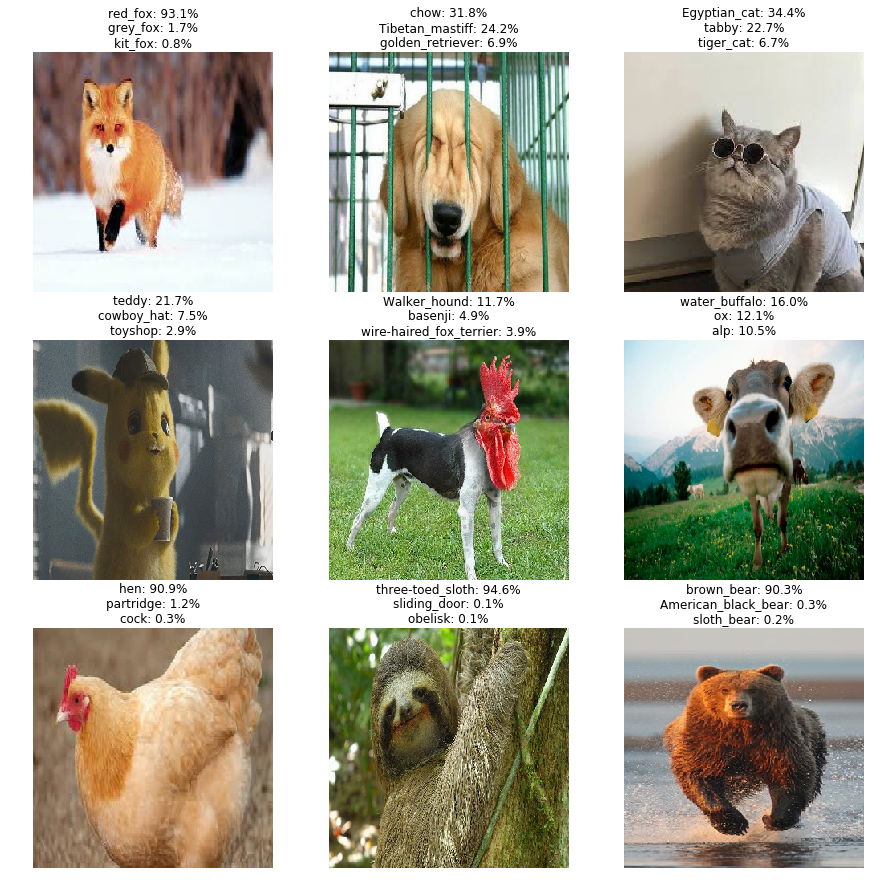

In [112]:
plt.figure(figsize=(15,15))
subplot_idx = 331
plt.subplot(subplot_idx)
processed_images = []
for image_path in image_paths:
    plt.subplot(subplot_idx)
    #load and process image
    imported_image = image.load_img(image_path, target_size=(299,299))
    x = image.img_to_array(imported_image)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    # Make image prediction with inception_v3 model
    prediction = inception_v3_model.predict(x)
    decoded_prediction = decode_predictions(prediction, top=3)[0]
    top_1 = str.format("{}: {:.1f}%", decoded_prediction[0][1], decoded_prediction[0][2]*100)
    top_2 = str.format("{}: {:.1f}%", decoded_prediction[1][1], decoded_prediction[1][2]*100)
    top_3 = str.format("{}: {:.1f}%", decoded_prediction[2][1], decoded_prediction[2][2]*100)
    full_prediction_string = top_1 + "\n" + top_2 + "\n" + top_3
    
    
    # Show images with predictions
    plt.imshow(imported_image)
    subplot_idx += 1
    plt.axis("off")
    plt.title(full_prediction_string)
plt.show()

## What did we accomplish??

1. Visualized how different convolutional filters pick out certain parts of an image
2. Built and trained CNN on MNIST data (implemented in pure tensorflow and with keras) to achieve 98.8% precision the test set. Network architecture was:
    * convolutional layer 1: 3x3, 32 filters, stride 1 
    * convolutional layer 2: 3x3, 64 filters, stride 2
    * max pooling layer with stride 2
    * fully connected layer with 64 units and ReLu activation
    * softmax output layer with 10 units
3. Imported Google's Inception_v3 neural network and looked at how it classified pictures of animals (and non-animal creatures).